Скачиваем датасет с кошками и собаками. 25000 тренировочных фото кошек и собак различного размера (100-500 пикселей на каждую сторону)

In [1]:
!wget --no-check-certificate \
    https://www.floydhub.com/api/v1/download/artifacts/data/VbpRSQnFkQmYaBUtwt3aca?is_dir=true&path=train \
    #https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip \
    #-O /tmp/cats_and_dogs_filtered.zip

--2019-12-01 19:31:06--  https://www.floydhub.com/api/v1/download/artifacts/data/VbpRSQnFkQmYaBUtwt3aca?is_dir=true
Resolving www.floydhub.com (www.floydhub.com)... 104.26.0.30, 104.26.1.30, 2606:4700:20::681a:11e, ...
Connecting to www.floydhub.com (www.floydhub.com)|104.26.0.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘VbpRSQnFkQmYaBUtwt3aca?is_dir=true’

VbpRSQnFkQmYaBUtwt3     [                <=> ] 845.69M  10.4MB/s    in 2m 7s   

2019-12-01 19:33:14 (6.65 MB/s) - ‘VbpRSQnFkQmYaBUtwt3aca?is_dir=true’ saved [886773760]



Скачиваем датасет с разными картинками. Около 10000 фото 101 класса различного размера (300 x 200)

In [2]:
!wget --no-check-certificate \
http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz \
-O /tmp/101_ObjectCategories.tar.gz


--2019-12-01 19:33:16--  http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz
Resolving www.vision.caltech.edu (www.vision.caltech.edu)... 34.208.54.77
Connecting to www.vision.caltech.edu (www.vision.caltech.edu)|34.208.54.77|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131740031 (126M) [application/x-tar]
Saving to: ‘/tmp/101_ObjectCategories.tar.gz’

/tmp/101_ObjectCate 100%[===================>] 125.64M  8.99MB/s    in 20s     

2019-12-01 19:33:37 (6.31 MB/s) - ‘/tmp/101_ObjectCategories.tar.gz’ saved [131740031/131740031]



Распаковываем данные

In [0]:
import os
import zipfile
import tarfile

#local_zip = '/tmp/cats_and_dogs_filtered.zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('tmp/')
#zip_ref.close()

local_tar = 'VbpRSQnFkQmYaBUtwt3aca?is_dir=true'
tar_ref = tarfile.open(local_tar, 'r')
tar_ref.extractall('tmp/')
tar_ref.close()

local_tar = '/tmp/101_ObjectCategories.tar.gz'
tar_ref = tarfile.open(local_tar, 'r')
tar_ref.extractall('tmp/')
tar_ref.close()

Смешиваем данные разных датасетов

In [0]:
base_dir = 'tmp'

images_base_dir = 'tmp/101_ObjectCategories'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_other_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_other_dir = os.path.join(validation_dir, 'dogs')

Делаем случайную выборку разных фоток

In [5]:
import random
other_split = 0.8

# копируем фото из 101_ObjectCategories в cats and dogs
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(images_base_dir):
    dirs = r.split("/")
    for file in f:
        new_name = dirs[-1] + "_" + file
        path = os.path.join(r, file)
        files.append((path, new_name))

random.shuffle(files)
random_images = files
other_files_count = len(files)
print("other images count: ", other_files_count)
other_train_image_count = int(other_files_count * other_split)
other_validation_image_count = int(other_files_count - other_train_image_count)



other images count:  9145


Копируем фото

In [6]:
def copy(files, to_dir):
    for path, name in files:
        new_name = os.path.join(to_dir, name)
        command = 'cp ' + path + ' ' + new_name
        os.system(command)
print(random_images[0])
copy(random_images[:other_train_image_count], train_other_dir)
copy(random_images[other_train_image_count:], validation_other_dir)


('tmp/101_ObjectCategories/dolphin/image_0053.jpg', 'dolphin_image_0053.jpg')


Первые десять картинок

In [7]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_other_fnames = os.listdir(train_other_dir)
train_other_fnames.sort()
print(train_other_fnames[:10])

['cat.5096.jpg', 'cat.1509.jpg', 'cat.6967.jpg', 'cat.6521.jpg', 'cat.9774.jpg', 'cat.10283.jpg', 'cat.12346.jpg', 'cat.4594.jpg', 'cat.7730.jpg', 'cat.855.jpg']
['BACKGROUND_Google_image_0001.jpg', 'BACKGROUND_Google_image_0002.jpg', 'BACKGROUND_Google_image_0004.jpg', 'BACKGROUND_Google_image_0006.jpg', 'BACKGROUND_Google_image_0007.jpg', 'BACKGROUND_Google_image_0008.jpg', 'BACKGROUND_Google_image_0009.jpg', 'BACKGROUND_Google_image_0010.jpg', 'BACKGROUND_Google_image_0011.jpg', 'BACKGROUND_Google_image_0012.jpg']


Всего картинок

In [8]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training other images:', len(os.listdir(train_other_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation other images:', len(os.listdir(validation_other_dir)))

total training cat images: 11500
total training other images: 18816
total validation cat images: 1000
total validation other images: 2829


Настраиваем параметры для отображение примера из датасета

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

16 примеров

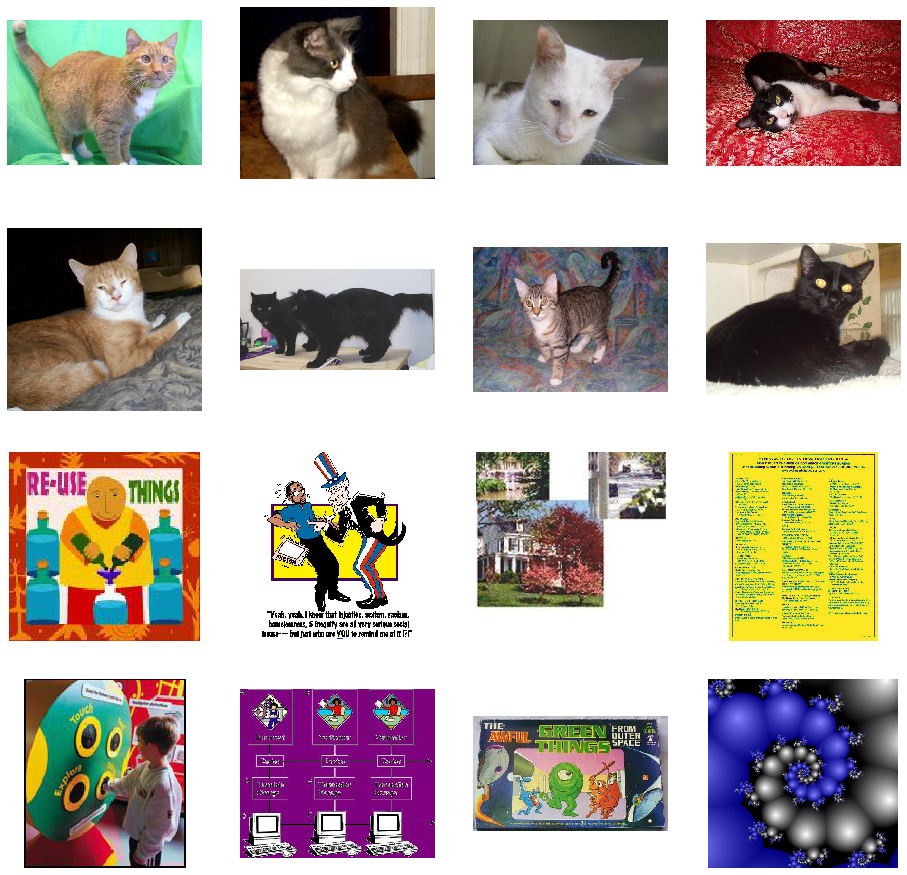

In [10]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_other_pix = [os.path.join(train_other_dir, fname) 
                for fname in train_other_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_other_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


Импортируем слои и модель

In [0]:
#import tensorflow as tf
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import regularizers

import numpy as np


Построим простую модель

In [12]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

reg = 0.0001

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu', kernel_regularizer=regularizers.l2(l=reg))(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu', kernel_regularizer=regularizers.l2(l=reg))(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu', kernel_regularizer=regularizers.l2(l=reg))(x)
x = layers.MaxPooling2D(2)(x)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Добавим полносвязные слои

In [0]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(l=reg))(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(l=reg))(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer

model = Model(img_input, output)

Выведем информацию о модели

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

Параметры тренировки

In [15]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Подготавливаем данные

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=100,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='binary')

Found 30315 images belonging to 2 classes.
Found 3829 images belonging to 2 classes.


Тренируем модель

In [17]:

history = model.fit_generator(
      train_generator,
      steps_per_epoch=300,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)


Epoch 1/15
Epoch 1/15
300/300 - 86s - loss: 0.6482 - acc: 0.6898 - val_loss: 0.4593 - val_acc: 0.7832
Epoch 2/15
Epoch 1/15
300/300 - 80s - loss: 0.4945 - acc: 0.7751 - val_loss: 0.3856 - val_acc: 0.8404
Epoch 3/15
Epoch 1/15
300/300 - 80s - loss: 0.4467 - acc: 0.8106 - val_loss: 0.3559 - val_acc: 0.8584
Epoch 4/15
Epoch 1/15
300/300 - 79s - loss: 0.4152 - acc: 0.8306 - val_loss: 0.4115 - val_acc: 0.8296
Epoch 5/15
Epoch 1/15
300/300 - 78s - loss: 0.3939 - acc: 0.8449 - val_loss: 0.3158 - val_acc: 0.8956
Epoch 6/15
Epoch 1/15
300/300 - 79s - loss: 0.3640 - acc: 0.8629 - val_loss: 0.3354 - val_acc: 0.8780
Epoch 7/15
Epoch 1/15
300/300 - 78s - loss: 0.3415 - acc: 0.8758 - val_loss: 0.3616 - val_acc: 0.8676
Epoch 8/15
Epoch 1/15
300/300 - 78s - loss: 0.3188 - acc: 0.8921 - val_loss: 0.2990 - val_acc: 0.9008
Epoch 9/15
Epoch 1/15
300/300 - 79s - loss: 0.2961 - acc: 0.9040 - val_loss: 0.2996 - val_acc: 0.9068
Epoch 10/15
Epoch 1/15
300/300 - 78s - loss: 0.2656 - acc: 0.9199 - val_loss: 0.40

Результат тренировки

Text(0.5, 1.0, 'Training and validation loss')

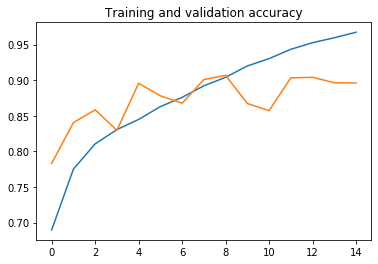

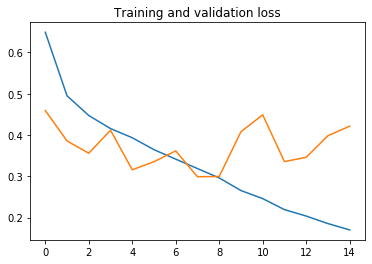

In [18]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

Экспорт модели в файл

In [19]:
# save the tf.keras model as .h5 model file
model_file = './cats.h5'
model.save(model_file)

!ls cats.h5

cats.h5


Импортируем конвертер в tensorFlow lite

Конвертируем в coreML

In [20]:
converter = tf.lite.TFLiteConverter.from_keras_model_file(model_file)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()
lite_model_file = "converted_model.tflite"
open(lite_model_file, "wb").write(tflite_model)

#!ls converted_model.tflite


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 10 variables.
INFO:tensorflow:Converted 10 variables to const ops.


9501960

In [21]:
# TensorFlow 2.0 isn't yet supported. Make sure you use 1.x

print("TensorFlow version {}".format(tf.__version__))
print("Eager mode: ", tf.executing_eagerly())
print("Is GPU available: ", tf.test.is_gpu_available())

TensorFlow version 1.15.0
Eager mode:  False
Is GPU available:  True


скачаем файл модели

In [23]:
#print( os.getcwd() )
from google.colab import files
files.download( lite_model_file )

KeyboardInterrupt: ignored

Сделаем предсказание

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        shuffle = False,
        class_mode='binary',
        batch_size=50)

filenames = test_generator.filenames
nb_samples = len(filenames)/50



In [0]:
from keras.preprocessing import image

img_path = os.path.join(train_cats_dir, "cat.451.jpg") 
#img_path = os.path.join("sample.png") 


img_size = 150
img = image.load_img(img_path, target_size=(img_size,img_size))

plt.imshow(img)

batch_holder = np.zeros((1, img_size, img_size, 3))

batch_holder[0, :] = img


predict = model.predict_generator(test_generator, steps=nb_samples)
#predict = model.evaluate(x=batch_holder, y=[1], batch_size = 1)

print(predict)

#print("{0:0.7f}".format(predict[0, 0]))
